## Import Dependancies

In [74]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KDTree
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud, STOPWORDS
#from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# File to Load (Remember to Change These)
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,CUR_ILL,HISTORY,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,33.0,26-35,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,64.0,56-65,1.0,0.0,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,37.0,36-45,1.0,1.0,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [23]:
severity = data_df['SEVERITY_LEVEL'].unique()

## Prep Data For Model

In [3]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X

,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0


In [18]:
# convert the serverity labels to numbers and create the target data
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y

array([0, 0, 0, ..., 2, 1, 1])

In [6]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [7]:
# Scaling the train data with StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Testing KNN to Determine Best k value

k: 1, Train/Test Score: 0.863/0.827
k: 3, Train/Test Score: 0.892/0.883
k: 5, Train/Test Score: 0.899/0.893
k: 7, Train/Test Score: 0.900/0.897
k: 9, Train/Test Score: 0.900/0.898
k: 11, Train/Test Score: 0.900/0.897
k: 13, Train/Test Score: 0.900/0.897
k: 15, Train/Test Score: 0.900/0.899
k: 17, Train/Test Score: 0.900/0.899
k: 19, Train/Test Score: 0.900/0.899


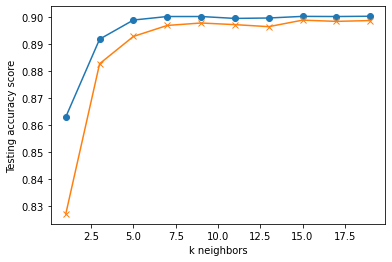

In [8]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

Based on the scores above, we will move forward with 5 neighbors for our model. This was run on 3 random states (33, 42, 7) and all began to stabilize at k=5. 

## Create KNN Model 

In [9]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.893


In [59]:
X.columns

Index(['OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M',
       'JANSSEN', 'MODERNA', 'PFIZER', 'VAX_DOSE_SERIES_1',
       'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35',
       '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96 +'],
      dtype='object')

In [60]:
# Sample Prediction 1
sample_user1 = [[0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0]]
predicted_symptoms = knn.predict(sample_user1)
print(severity[predicted_symptoms])

['MILD']


In [75]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query(sample_user1, k=50)

#convery ndarry to list 
like_users = ind[0].tolist()
print(like_users)  # indices of 5 closest neighbors

[5421, 3158, 6329, 19238, 20622, 12221, 18004, 10237, 14602, 337, 335, 21829, 8516, 12200, 4516, 6325, 5086, 12530, 21448, 13048, 15023, 14879, 7091, 20363, 2365, 4837, 167, 16324, 9524, 2051, 5805, 1797, 5819, 1744, 5352, 4657, 4635, 186, 8460, 3340, 584, 543, 4405, 4402, 348, 4457, 4614, 3017, 4268, 377]


In [88]:

predicted_symptoms = data_df['SYMPTOM'].iloc[like_users].tolist()
predicted_symptoms[:5]

['Chills',
 'Nausea',
 'Injection site pain',
 'Injection site pruritus',
 'Abdominal pain']

In [25]:
# Sample Prediction 2
sample_user2 = [[0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]]
predicted_symptoms = knn.predict(sample_user2)
print(severity[predicted_symptoms])

['MILD']


In [ ]:
merge2_df.head()

In [ ]:
merge2_df.to_csv('training_data.csv')

In [30]:
tree = KDTree(X)
ind = tree.query([[1.25, 1.35]], k=5)
print(ind)  # indices of 5 closest neighbors


print('People like you reported the following symptoms:')

ValueError: query data dimension must match training data dimension